In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
%cd drive/MyDrive/IDLS_PROJECT/Hate-Speech-Classification/

[Errno 2] No such file or directory: 'drive/MyDrive/IDLS_PROJECT/Hate-Speech-Classification/'
/content/drive/MyDrive/IDLS_PROJECT/Hate-Speech-Classification


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('stats.csv')
df

,Network Type,Dataset,accuracy,f1_sc,train_time,test_time
0,Naive Bayes,Combined,0.552897,0.466401,4.092968,0.000406
1,Naive Bayes,Reddit,0.513077,0.426024,4.493333,0.000381
2,Linear SVC,Combined,0.529346,0.516501,5.232209,0.000392
3,Linear SVC,Reddit,0.513077,0.509112,5.636648,0.000415
4,Simple NN,Combined,0.766729,0.766644,26.038965,0.000560
5,Simple NN,Reddit,0.824061,0.823587,15.202149,0.000485
6,Simple NN with dropout,Combined,0.785794,0.785495,25.331161,0.000518
7,Simple NN with dropout,Reddit,0.799810,0.799490,15.415281,0.000505
8,Simple NN with Batch Norm,Combined,0.779813,0.779748,18.064883,0.000524
9,Simple NN with Batch Norm,Reddit,0.801236,0.801235,16.534130,0.000570


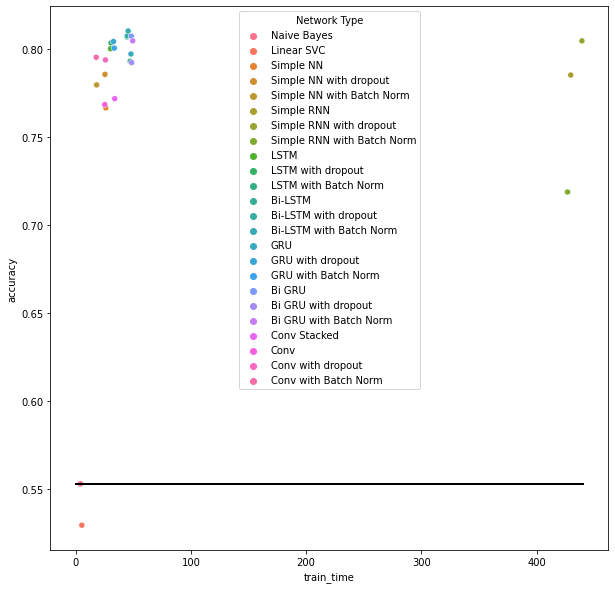

In [27]:
df_combined = df.query("Dataset == 'Combined'")
plt.figure(figsize=(10,10));
baseline = max(df_combined[df_combined['Network Type'] == "Naive Bayes"]['accuracy'].to_numpy()[0],
df_combined[df_combined['Network Type'] == "Linear SVC"]['accuracy'].to_numpy()[0])
plt.plot([0, df_combined['train_time'].max()+1], [baseline, baseline], 'k-', lw=2);
sns.scatterplot(data=df_combined, x="train_time", y="accuracy", hue="Network Type");


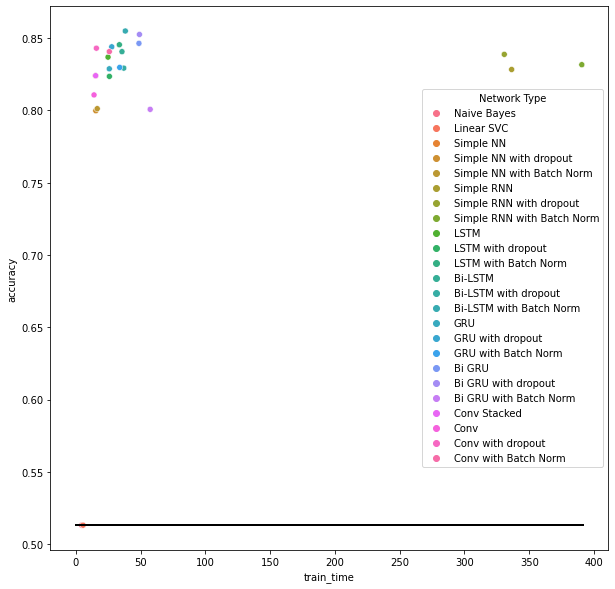

In [28]:
df_reddit = df.query("Dataset == 'Reddit'")
plt.figure(figsize=(10,10));
baseline = max(df_reddit[df_reddit['Network Type'] == "Naive Bayes"]['accuracy'].to_numpy()[0],
df_reddit[df_reddit['Network Type'] == "Linear SVC"]['accuracy'].to_numpy()[0])
plt.plot([0, df_reddit['train_time'].max()+1], [baseline, baseline], 'k-', lw=2);
sns.scatterplot(data=df_reddit, x="train_time", y="accuracy", hue="Network Type");


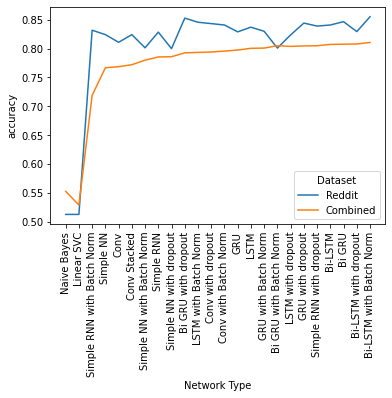

In [29]:
sns.lineplot(data=df.sort_values(by=['accuracy']), x="Network Type", y="accuracy", hue="Dataset");
plt.xticks(rotation=90);

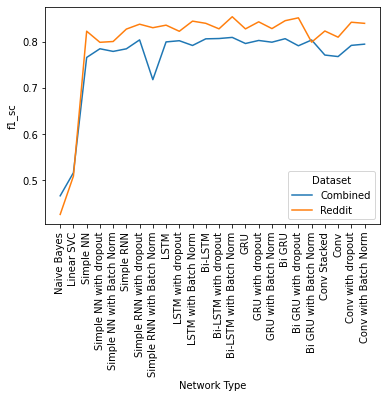

In [30]:
sns.lineplot(data=df, x="Network Type", y="f1_sc", hue="Dataset");
plt.xticks(rotation=90);